## Use the state data (New Jersey) generated in Stage II to fit a distribution to the number of COVID-19 cases. (25 points)

### Import libraries 

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
from scipy.stats import poisson
from IPython.display import Image
from plotly.subplots import make_subplots

### Plot the distribution and describe the distribution statistics

In [2]:
cases = pd.read_csv('covid_confirmed_usafacts.csv')
cases.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,19913,19913,19913,19913,19913,19913,19913,19913,19913,19913
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,70521,70521,70521,70521,70521,70521,70521,70521,70521,70521
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,7582,7582,7582,7582,7582,7582,7582,7582,7582,7582
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,8149,8149,8149,8149,8149,8149,8149,8149,8149,8149


In [3]:
nj_cases = cases[cases["State"] == "NJ"]
selected_date_columns = [col for col in nj_cases.columns if '2020-07-01' <= col <= '2020-12-31']
nj_cases = nj_cases[selected_date_columns]
nj_cases.head()

,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
1804,643,672,658,679,685,695,682,656,665,667,...,1083,1077,1105,1107,1116,1129,1128,1082,1042,1057
1805,2878,2898,2924,2926,2936,2949,2961,2962,2976,2987,...,10962,11080,11224,11395,11585,11688,11765,14480,14717,14920
1806,19445,19474,19532,19562,19625,19655,19676,19732,19771,19827,...,43707,44166,44626,45064,45360,45585,45840,50441,50991,51622
1807,5189,5221,5238,5243,5262,5277,5295,5306,5316,5332,...,18945,19213,19517,19763,20061,20147,20326,22311,22826,23071
1808,7368,7406,7419,7434,7479,7496,7536,7573,7600,7631,...,26272,26533,26850,27150,27459,27618,27739,30373,30726,31088


In [4]:
count = 2
weekly_cases_nj = [] 
for col in nj_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_nj.append(nj_cases[col].sum())
weekly_cases_nj_data = pd.Series(weekly_cases_nj)

### Plot the data

<Axes: >

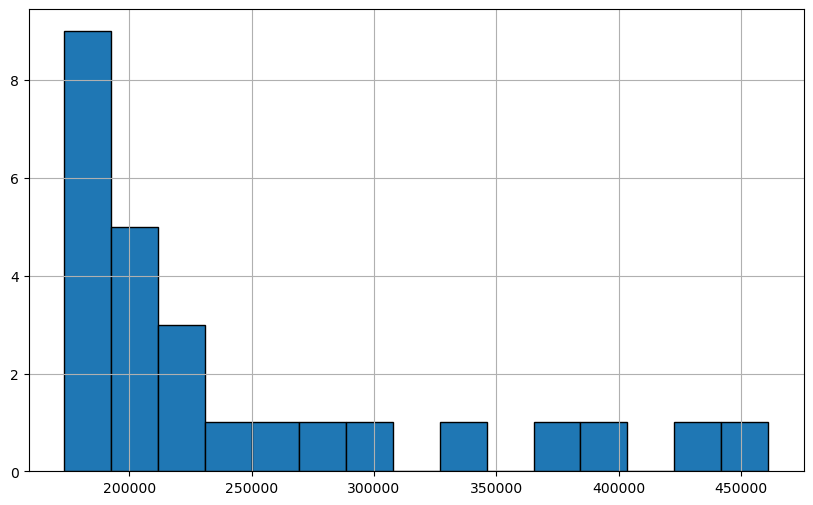

In [5]:
weekly_cases_nj_data.hist(bins=15, ec='black', figsize=(10, 6))

### The type of distribution (modality) and its statistics 

In [6]:
mean = weekly_cases_nj_data.mean()
print(f"Mean: {mean:.2f}")

median = weekly_cases_nj_data.median()
print(f"Median: {median:.2f}")

variance = weekly_cases_nj_data.var()
print(f"Variance: {variance:.2f}")

skew = weekly_cases_nj_data.skew()
print(f"Skew: {skew:.4f}")

kurtosis = weekly_cases_nj_data.kurt()
print(f"Kurtosis: {kurtosis:.4f}")

print("\n Skewed right distribution")

Mean: 245383.96
Median: 205874.50
Variance: 7281249318.36
Skew: 1.4162
Kurtosis: 0.8804

 Skewed right distribution


## Compare the New Jersey distribution and its statistics to 5 other states


### California

<Axes: >

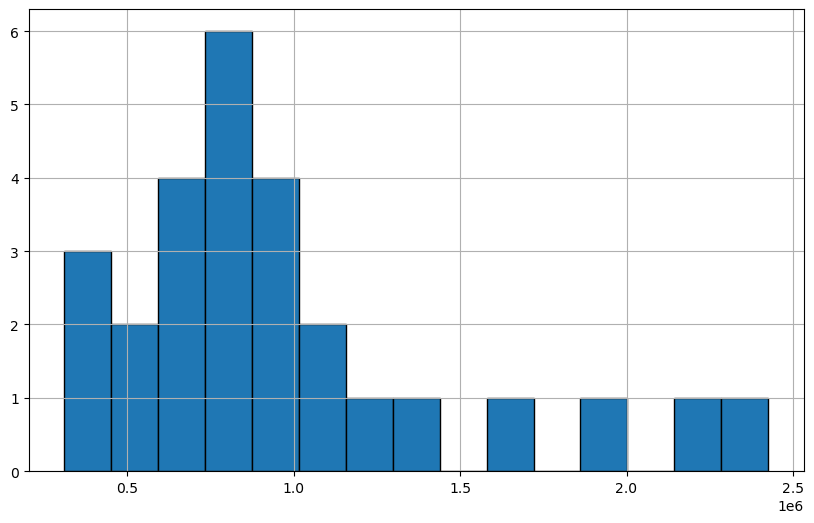

In [7]:
ca_cases = cases[cases["State"] == "CA"]
selected_date_columns = [col for col in ca_cases.columns if '2020-07-01' <= col <= '2020-12-31']
ca_cases = ca_cases[selected_date_columns]

count = 6
weekly_cases_ca = []
for col in ca_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_ca.append(ca_cases[col].sum())
weekly_cases_ca_data = pd.Series(weekly_cases_ca)

weekly_cases_ca_data.hist(bins=15, ec='black', figsize=(10, 6))

In [8]:
mean = weekly_cases_ca_data.mean()
print(f"Mean: {mean:.2f}")

median = weekly_cases_ca_data.median()
print(f"Median: {median:.2f}")

variance = weekly_cases_ca_data.var()
print(f"Variance: {variance:.2f}")

skew = weekly_cases_ca_data.skew()
print(f"Skew: {skew:.4f}")

kurtosis = weekly_cases_ca_data.kurt()
print(f"Kurtosis: {kurtosis:.4f}")

print("\n Skewed right distribution")

Mean: 973949.44
Median: 834789.00
Variance: 271986757653.56
Skew: 1.4319
Kurtosis: 1.7708

 Skewed right distribution


### New York

<Axes: >

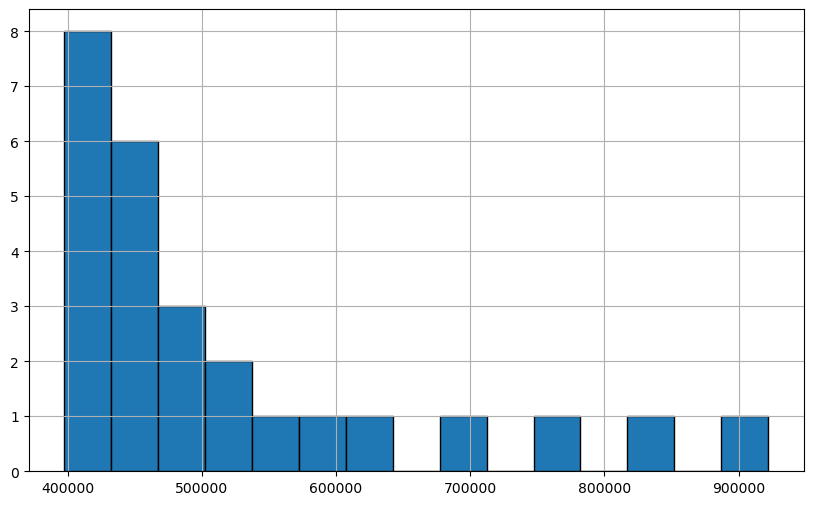

In [9]:
ny_cases = cases[cases["State"] == "NY"]
selected_date_columns = [col for col in ny_cases.columns if '2020-07-01' <= col <= '2020-12-31']
ny_cases = ny_cases[selected_date_columns]

count = 2
weekly_cases_ny = []
for col in ny_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_ny.append(ny_cases[col].sum())
weekly_cases_ny_data = pd.Series(weekly_cases_ny)

weekly_cases_ny_data.hist(bins=15, ec='black', figsize=(10, 6))

In [10]:
mean = weekly_cases_ny_data.mean()
print(f"Mean: {mean:.2f}")

median = weekly_cases_ny_data.median()
print(f"Median: {median:.2f}")

variance = weekly_cases_ny_data.var()
print(f"Variance: {variance:.2f}")

skew = weekly_cases_ny_data.skew()
print(f"Skew: {skew:.4f}")

kurtosis = weekly_cases_ny_data.kurt()
print(f"Kurtosis: {kurtosis:.4f}")

print("\n Skewed right distribution")

Mean: 520815.46
Median: 460173.00
Variance: 20728278051.54
Skew: 1.6273
Kurtosis: 1.8541

 Skewed right distribution


### Texas

<Axes: >

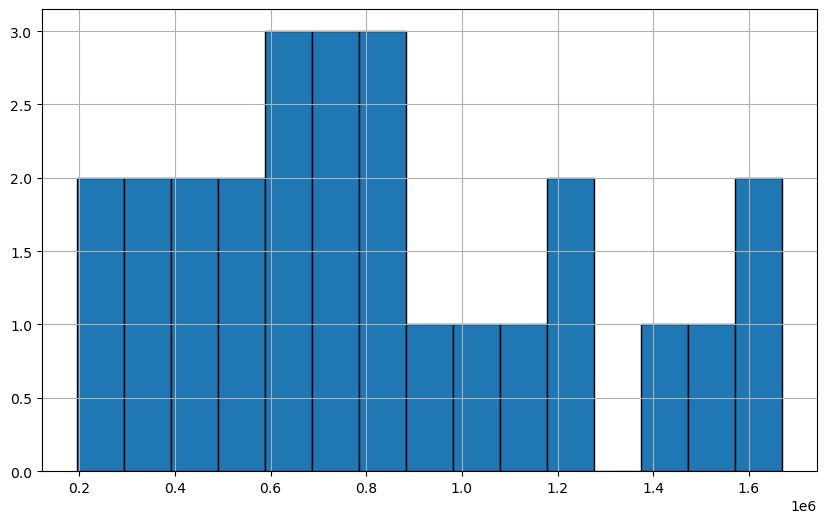

In [11]:
tx_cases = cases[cases["State"] == "TX"]
selected_date_columns = [col for col in tx_cases.columns if '2020-07-01' <= col <= '2020-12-31']
tx_cases = tx_cases[selected_date_columns]

count = 2
weekly_cases_tx = []
for col in tx_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_tx.append(tx_cases[col].sum())
weekly_cases_tx_data = pd.Series(weekly_cases_tx)

weekly_cases_tx_data.hist(bins=15, ec='black', figsize=(10, 6))

In [12]:
mean = weekly_cases_tx_data.mean()
print(f"Mean: {mean:.2f}")

median = weekly_cases_tx_data.median()
print(f"Median: {median:.2f}")

variance = weekly_cases_tx_data.var()
print(f"Variance: {variance:.2f}")

skew = weekly_cases_tx_data.skew()
print(f"Skew: {skew:.4f}")

kurtosis = weekly_cases_tx_data.kurt()
print(f"Kurtosis: {kurtosis:.4f}")

print("\n Fairly Symmetrical distribution")

Mean: 824843.42
Median: 750513.00
Variance: 167954899301.77
Skew: 0.5291
Kurtosis: -0.5469

 Fairly Symmetrical distribution


### Flordia

<Axes: >

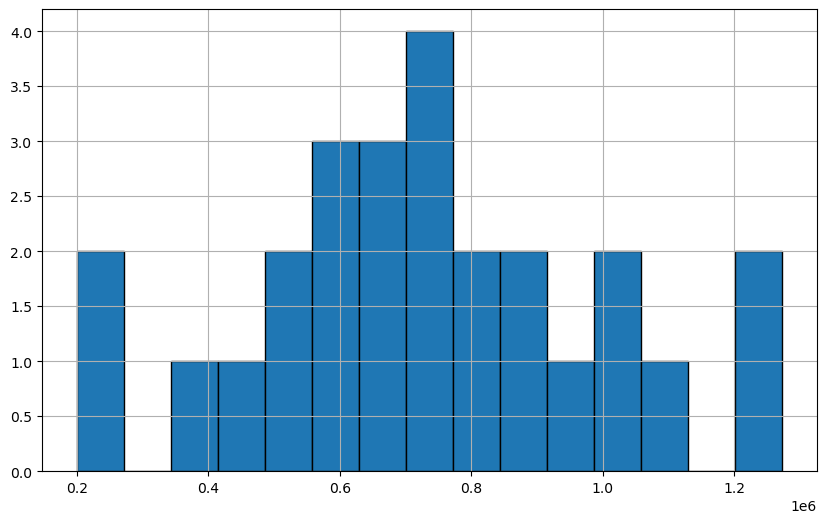

In [13]:
fl_cases = cases[cases["State"] == "FL"]
selected_date_columns = [col for col in fl_cases.columns if '2020-07-01' <= col <= '2020-12-31']
fl_cases = fl_cases[selected_date_columns]

count = 2
weekly_cases_fl = []
for col in fl_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_fl.append(fl_cases[col].sum())
weekly_cases_fl_data = pd.Series(weekly_cases_fl)

weekly_cases_fl_data.hist(bins=15, ec='black', figsize=(10, 6))

In [14]:
mean = weekly_cases_fl_data.mean()
print(f"Mean: {mean:.2f}")

median = weekly_cases_fl_data.median()
print(f"Median: {median:.2f}")

variance = weekly_cases_fl_data.var()
print(f"Variance: {variance:.2f}")

skew = weekly_cases_fl_data.skew()
print(f"Skew: {skew:.4f}")

kurtosis = weekly_cases_fl_data.kurt()
print(f"Kurtosis: {kurtosis:.4f}")

print("\n Symmetrical distribution")

Mean: 725452.38
Median: 708508.00
Variance: 73340089922.33
Skew: 0.1285
Kurtosis: -0.1870

 Symmetrical distribution


### North Carolina

<Axes: >

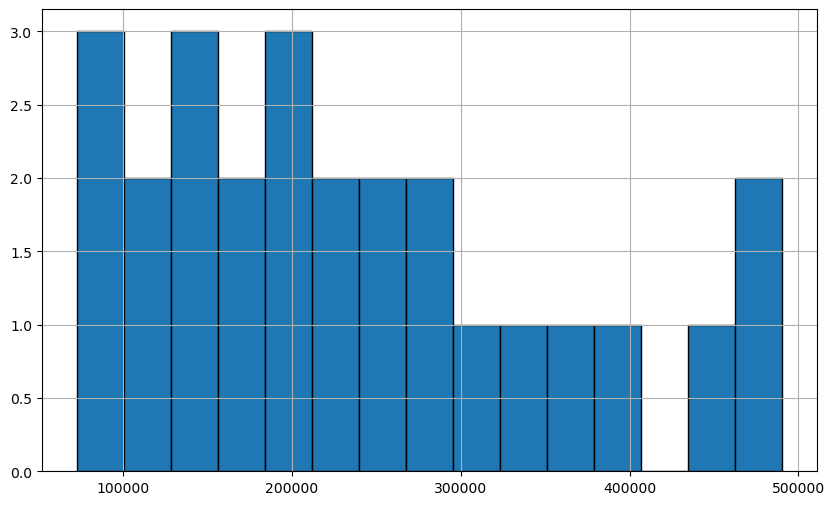

In [15]:
nc_cases = cases[cases["State"] == "NC"]
selected_date_columns = [col for col in nc_cases.columns if '2020-07-01' <= col <= '2020-12-31']
nc_cases = nc_cases[selected_date_columns]

count = 2
weekly_cases_nc = []
for col in nc_cases.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_cases_nc.append(nc_cases[col].sum())
weekly_cases_nc_data = pd.Series(weekly_cases_nc)

weekly_cases_nc_data.hist(bins=15, ec='black', figsize=(10, 6))

In [16]:
mean = weekly_cases_nc_data.mean()
print(f"Mean: {mean:.2f}")

median = weekly_cases_nc_data.median()
print(f"Median: {median:.2f}")

variance = weekly_cases_nc_data.var()
print(f"Variance: {variance:.2f}")

skew = weekly_cases_nc_data.skew()
print(f"Skew: {skew:.4f}")

kurtosis = weekly_cases_nc_data.kurt()
print(f"Kurtosis: {kurtosis:.4f}")

print("\n Skewed right distribution")

Mean: 237939.42
Median: 212416.50
Variance: 14323905182.73
Skew: 0.7029
Kurtosis: -0.3561

 Skewed right distribution


### Describe the distributions 

When comparing the distributions and their statistics to those of five other states, it becomes evident that the majority of the distributions exhibit a symmetric shape. Additionally, these distributions tend to skew to the right.

Seeing this right-leaning shape in most states' charts tells us that there's a common story about how COVID-19 cases were going up. It looks like a lot of states had a similar ride with the virus, with big jumps in cases at certain times and then some ups and downs. The fact that these charts look alike in different places means that maybe the same sorts of things were affecting how the virus spread and was kept in check.

## Model a poission distribution of COVID-19 cases and deaths of a state and compare to other 5 states. Describe how the poission modeling is different from the first modeling you did. (25 points)

###  Poission distribution of COVID-19 cases of New Jersey and 5 other states

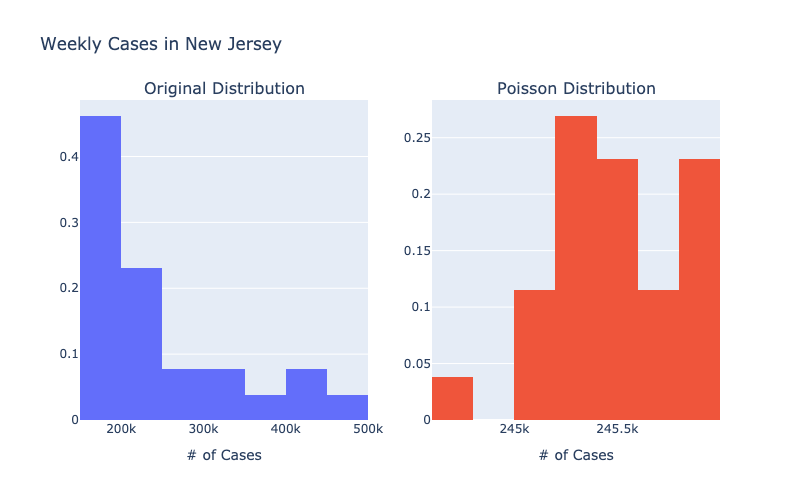

In [17]:
poisson_nj = np.random.poisson(np.mean(weekly_cases_nj_data), len(weekly_cases_nj_data))

fig = make_subplots(rows=1, cols=2, subplot_titles=('Original Distribution', 'Poisson Distribution'))

fig.add_trace(
    go.Histogram(x=weekly_cases_nj_data, histnorm='probability'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=poisson_nj, histnorm='probability'),
    row=1, col=2
)

fig.update_xaxes(title_text="# of Cases", row=1, col=1)
fig.update_xaxes(title_text="# of Cases", row=1, col=2)
fig.update_layout(
    title='Weekly Cases in New Jersey',
    showlegend=False,
    width=800,
    height=500
)

fig.write_image("nj_poisson.png")
Image(filename="nj_poisson.png")

 ### California

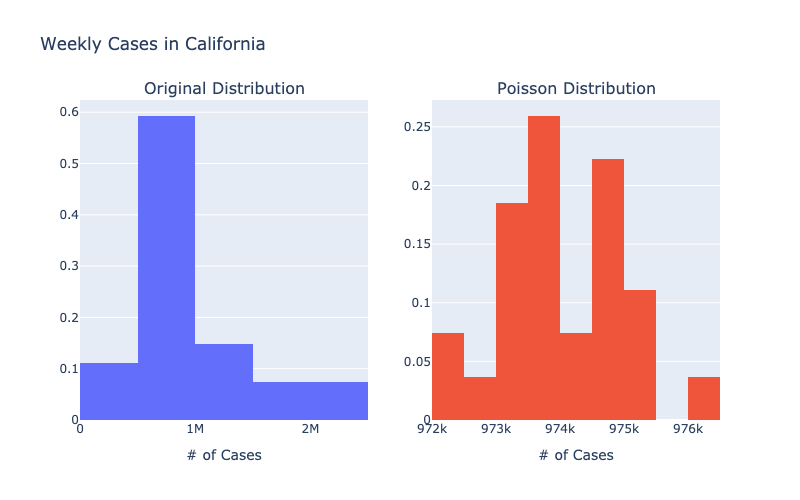

In [18]:
poisson_ca = np.random.poisson(np.mean(weekly_cases_ca_data), len(weekly_cases_ca_data))

fig = make_subplots(rows=1, cols=2, subplot_titles=('Original Distribution', 'Poisson Distribution'))

fig.add_trace(
    go.Histogram(x=weekly_cases_ca_data, histnorm='probability'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=poisson_ca, histnorm='probability'),
    row=1, col=2
)

fig.update_xaxes(title_text="# of Cases", row=1, col=1)
fig.update_xaxes(title_text="# of Cases", row=1, col=2)
fig.update_layout(
    title='Weekly Cases in California',
    showlegend=False,
    width=800,
    height=500
)

fig.write_image("ca_poisson.png")
Image(filename="ca_poisson.png")

### New York

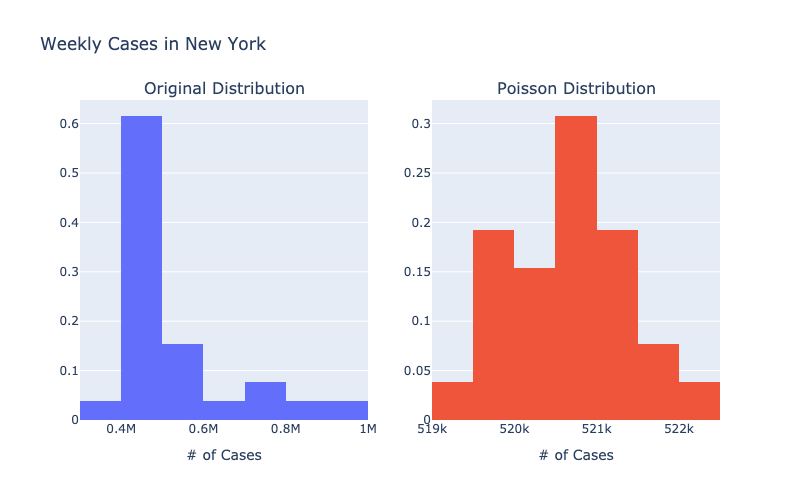

In [19]:
poisson_ny = np.random.poisson(np.mean(weekly_cases_ny_data), len(weekly_cases_ny_data))

fig = make_subplots(rows=1, cols=2, subplot_titles=('Original Distribution', 'Poisson Distribution'))

fig.add_trace(
    go.Histogram(x=weekly_cases_ny_data, histnorm='probability'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=poisson_ny, histnorm='probability'),
    row=1, col=2
)

fig.update_xaxes(title_text="# of Cases", row=1, col=1)
fig.update_xaxes(title_text="# of Cases", row=1, col=2)
fig.update_layout(
    title='Weekly Cases in New York',
    showlegend=False,
    width=800,
    height=500
)

fig.write_image("ny_poisson.png")
Image(filename="ny_poisson.png")

### Texas

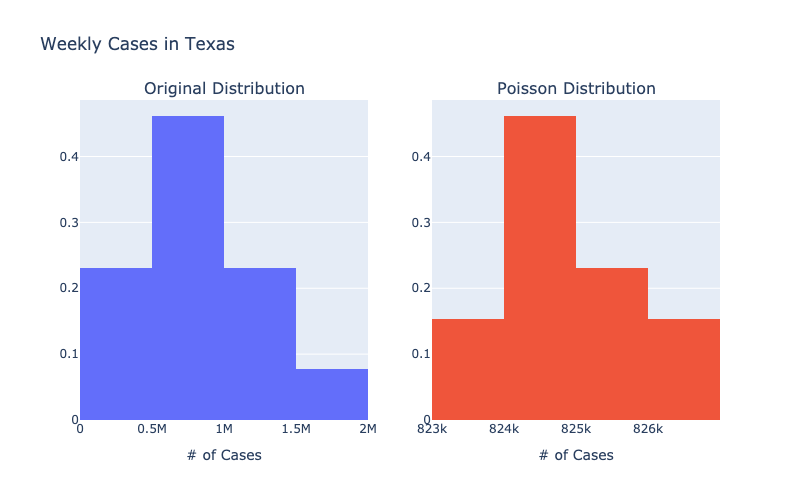

In [20]:
poisson_tx = np.random.poisson(np.mean(weekly_cases_tx_data), len(weekly_cases_tx_data))

fig = make_subplots(rows=1, cols=2, subplot_titles=('Original Distribution', 'Poisson Distribution'))

fig.add_trace(
    go.Histogram(x=weekly_cases_tx_data, histnorm='probability'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=poisson_tx, histnorm='probability'),
    row=1, col=2
)

fig.update_xaxes(title_text="# of Cases", row=1, col=1)
fig.update_xaxes(title_text="# of Cases", row=1, col=2)
fig.update_layout(
    title='Weekly Cases in Texas',
    showlegend=False,
    width=800,
    height=500
)

fig.write_image("tx_poisson.png")
Image(filename="tx_poisson.png")

### Flordia

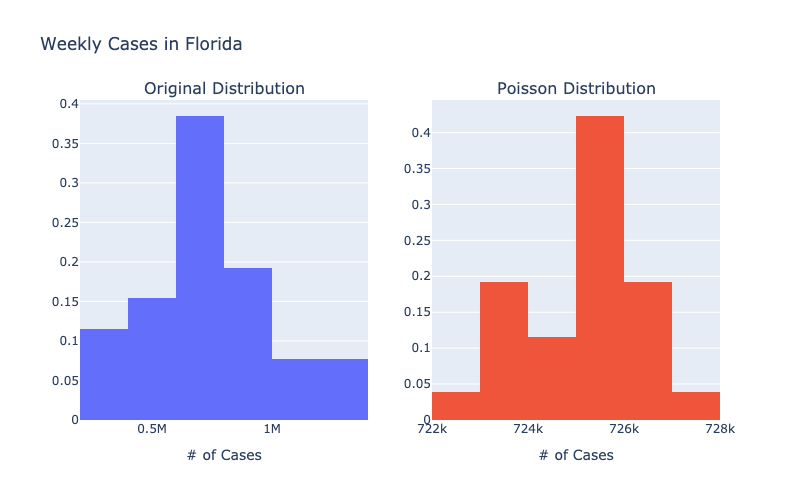

In [21]:
poisson_fl = np.random.poisson(np.mean(weekly_cases_fl_data), len(weekly_cases_fl_data))

fig = make_subplots(rows=1, cols=2, subplot_titles=('Original Distribution', 'Poisson Distribution'))

fig.add_trace(
    go.Histogram(x=weekly_cases_fl_data, histnorm='probability'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=poisson_fl, histnorm='probability'),
    row=1, col=2
)

fig.update_xaxes(title_text="# of Cases", row=1, col=1)
fig.update_xaxes(title_text="# of Cases", row=1, col=2)
fig.update_layout(
    title='Weekly Cases in Florida',
    showlegend=False,
    width=800,
    height=500
)

fig.write_image("fl_poisson.png")
Image(filename="fl_poisson.png")

### North Carolina

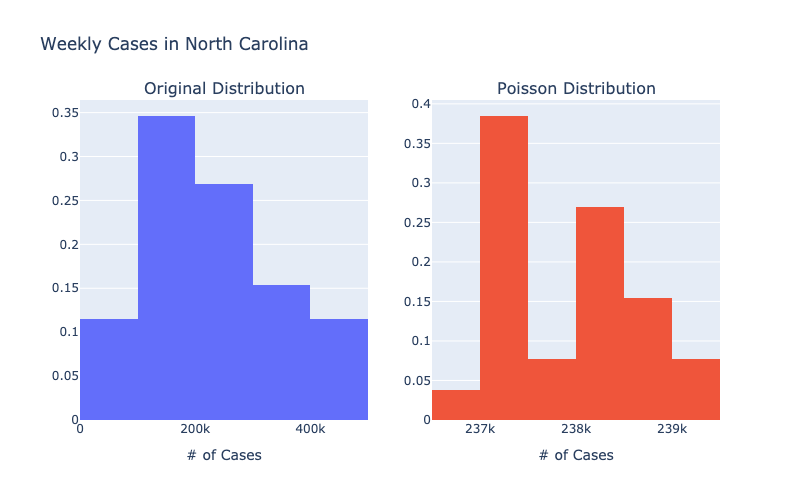

In [22]:
poisson_nc = np.random.poisson(np.mean(weekly_cases_nc_data), len(weekly_cases_nc_data))

fig = make_subplots(rows=1, cols=2, subplot_titles=('Original Distribution', 'Poisson Distribution'))

fig.add_trace(
    go.Histogram(x=weekly_cases_nc_data, histnorm='probability'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=poisson_nc, histnorm='probability'),
    row=1, col=2
)

fig.update_xaxes(title_text="# of Cases", row=1, col=1)
fig.update_xaxes(title_text="# of Cases", row=1, col=2)
fig.update_layout(
    title='Weekly Cases in North Carolina',
    showlegend=False,
    width=800,
    height=500
)

fig.write_image("nc_poisson.png")
Image(filename="nc_poisson.png")

##  Poission distribution of COVID-19 deaths of New Jersey and 5 other states

In [23]:
deaths = pd.read_csv('covid_deaths_usafacts.csv')
deaths.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,731
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111


In [24]:
nj_deaths = deaths[deaths["State"] == "NJ"]
selected_date_columns = [col for col in nj_deaths.columns if '2020-07-01' <= col <= '2020-12-31']
nj_deaths = nj_deaths[selected_date_columns]
nj_deaths.head()

,2020-07-01,2020-07-02,2020-07-03,2020-07-04,2020-07-05,2020-07-06,2020-07-07,2020-07-08,2020-07-09,2020-07-10,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,2020-12-31
1804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1805,216,219,220,220,221,221,222,224,226,229,...,339,345,350,355,357,360,359,364,366,368
1806,1996,1994,2000,2003,2004,2006,2009,2010,2020,2023,...,2257,2267,2275,2276,2277,2280,2282,2300,2312,2318
1807,428,429,431,433,433,434,438,441,446,447,...,598,603,604,606,606,606,606,610,620,624
1808,493,503,513,518,521,525,534,538,540,541,...,763,770,774,780,782,782,785,794,812,818


In [25]:
count = 2
weekly_deaths_nj = [] 
for col in nj_deaths.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_deaths_nj.append(nj_deaths[col].sum())
weekly_deaths_nj_data = pd.Series(weekly_deaths_nj)

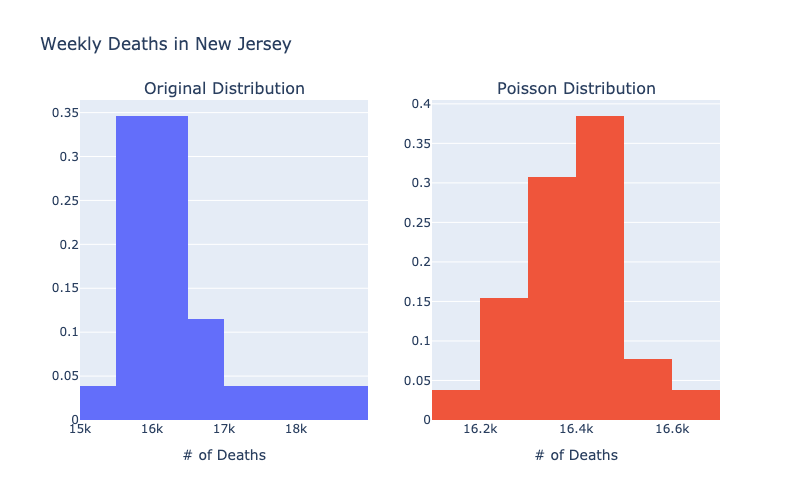

In [26]:
poisson_nj_deaths = np.random.poisson(np.mean(weekly_deaths_nj_data), len(weekly_deaths_nj_data))

fig = make_subplots(rows=1, cols=2, subplot_titles=('Original Distribution', 'Poisson Distribution'))

fig.add_trace(
    go.Histogram(x=weekly_deaths_nj_data, histnorm='probability'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=poisson_nj_deaths, histnorm='probability'),
    row=1, col=2
)

fig.update_xaxes(title_text="# of Deaths", row=1, col=1)
fig.update_xaxes(title_text="# of Deaths", row=1, col=2)
fig.update_layout(
    title='Weekly Deaths in New Jersey',
    showlegend=False,
    width=800,
    height=500
)

fig.write_image("nj_poisson_deaths.png")
Image(filename="nj_poisson_deaths.png")

### California

In [27]:
ca_deaths = deaths[deaths["State"] == "CA"]
selected_date_columns = [col for col in ca_deaths.columns if '2020-07-01' <= col <= '2020-12-31']
ca_deaths = ca_deaths[selected_date_columns]

count = 2
weekly_deaths_ca = [] 
for col in ca_deaths.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_deaths_ca.append(ca_deaths[col].sum())
weekly_deaths_ca_data = pd.Series(weekly_deaths_ca)

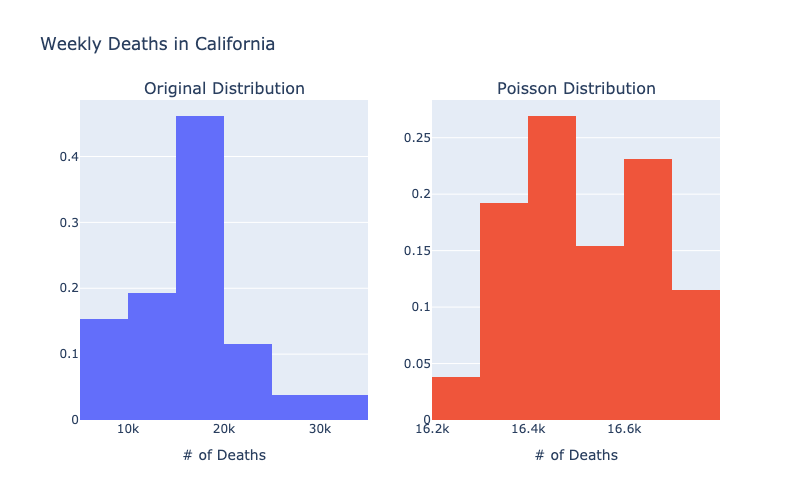

In [28]:
poisson_ca_deaths = np.random.poisson(np.mean(weekly_deaths_ca_data), len(weekly_deaths_ca_data))

fig = make_subplots(rows=1, cols=2, subplot_titles=('Original Distribution', 'Poisson Distribution'))

fig.add_trace(
    go.Histogram(x=weekly_deaths_ca_data, histnorm='probability'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=poisson_ca_deaths, histnorm='probability'),
    row=1, col=2
)

fig.update_xaxes(title_text="# of Deaths", row=1, col=1)
fig.update_xaxes(title_text="# of Deaths", row=1, col=2)
fig.update_layout(
    title='Weekly Deaths in California',
    showlegend=False,
    width=800,
    height=500
)

fig.write_image("ca_poisson_deaths.png")
Image(filename="ca_poisson_deaths.png")

### New York

In [29]:
ny_deaths = deaths[deaths["State"] == "NY"]
selected_date_columns = [col for col in ny_deaths.columns if '2020-07-01' <= col <= '2020-12-31']
ny_deaths = ny_deaths[selected_date_columns]

count = 2
weekly_deaths_ny = [] 
for col in ny_deaths.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_deaths_ny.append(ny_deaths[col].sum())
weekly_deaths_ny_data = pd.Series(weekly_deaths_ny)

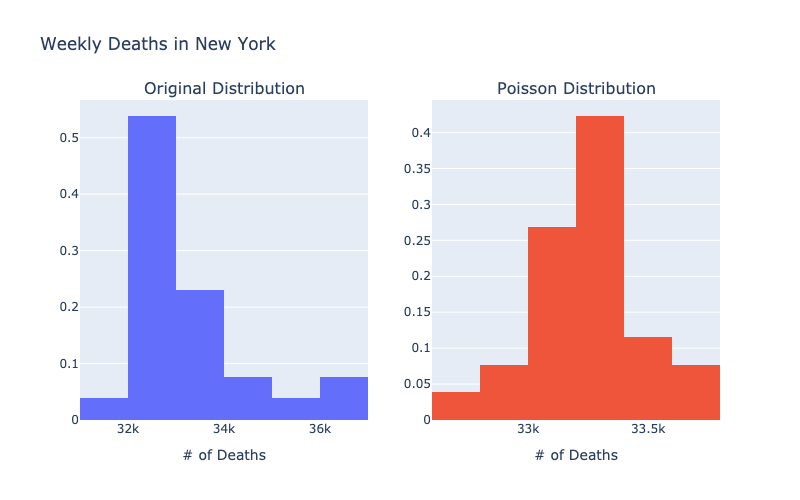

In [30]:
poisson_ny_deaths = np.random.poisson(np.mean(weekly_deaths_ny_data), len(weekly_deaths_ny_data))

fig = make_subplots(rows=1, cols=2, subplot_titles=('Original Distribution', 'Poisson Distribution'))

fig.add_trace(
    go.Histogram(x=weekly_deaths_ny_data, histnorm='probability'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=poisson_ny_deaths, histnorm='probability'),
    row=1, col=2
)

fig.update_xaxes(title_text="# of Deaths", row=1, col=1)
fig.update_xaxes(title_text="# of Deaths", row=1, col=2)
fig.update_layout(
    title='Weekly Deaths in New York',
    showlegend=False,
    width=800,
    height=500
)

fig.write_image("ny_poisson_deaths.png")
Image(filename="ny_poisson_deaths.png")

### Texas

In [31]:
tx_deaths = deaths[deaths["State"] == "TX"]
selected_date_columns = [col for col in tx_deaths.columns if '2020-07-01' <= col <= '2020-12-31']
tx_deaths = tx_deaths[selected_date_columns]

count = 2
weekly_deaths_tx = [] 
for col in tx_deaths.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_deaths_tx.append(tx_deaths[col].sum())
weekly_deaths_tx_data = pd.Series(weekly_deaths_tx)

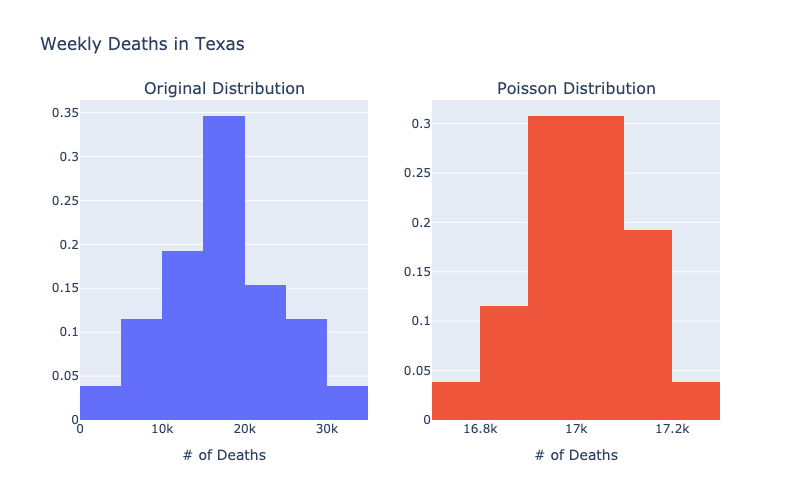

In [32]:
poisson_tx_deaths = np.random.poisson(np.mean(weekly_deaths_tx_data), len(weekly_deaths_tx_data))

fig = make_subplots(rows=1, cols=2, subplot_titles=('Original Distribution', 'Poisson Distribution'))

fig.add_trace(
    go.Histogram(x=weekly_deaths_tx_data, histnorm='probability'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=poisson_tx_deaths, histnorm='probability'),
    row=1, col=2
)

fig.update_xaxes(title_text="# of Deaths", row=1, col=1)
fig.update_xaxes(title_text="# of Deaths", row=1, col=2)
fig.update_layout(
    title='Weekly Deaths in Texas',
    showlegend=False,
    width=800,
    height=500
)

fig.write_image("tx_poisson_deaths.png")
Image(filename="tx_poisson_deaths.png")

### Flordia

In [33]:
fl_deaths = deaths[deaths["State"] == "FL"]
selected_date_columns = [col for col in fl_deaths.columns if '2020-07-01' <= col <= '2020-12-31']
fl_deaths = fl_deaths[selected_date_columns]

count = 2
weekly_deaths_fl = [] 
for col in fl_deaths.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_deaths_fl.append(fl_deaths[col].sum())
weekly_deaths_fl_data = pd.Series(weekly_deaths_fl)

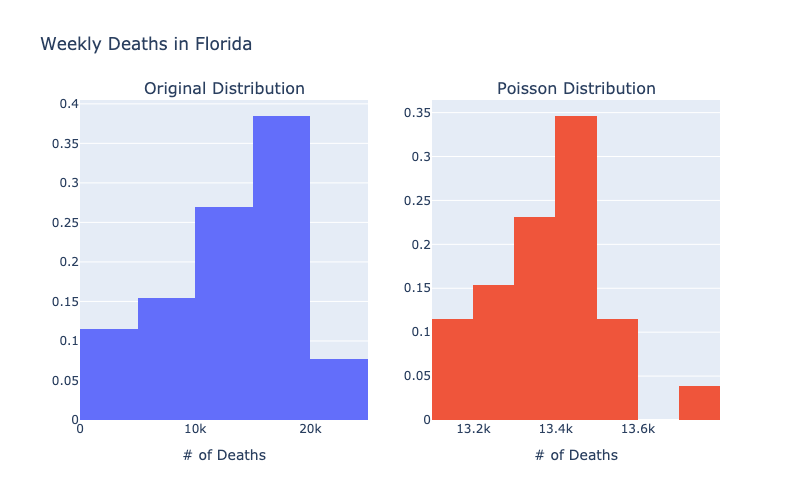

In [34]:
poisson_fl_deaths = np.random.poisson(np.mean(weekly_deaths_fl_data), len(weekly_deaths_fl_data))

fig = make_subplots(rows=1, cols=2, subplot_titles=('Original Distribution', 'Poisson Distribution'))

fig.add_trace(
    go.Histogram(x=weekly_deaths_fl_data, histnorm='probability'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=poisson_fl_deaths, histnorm='probability'),
    row=1, col=2
)

fig.update_xaxes(title_text="# of Deaths", row=1, col=1)
fig.update_xaxes(title_text="# of Deaths", row=1, col=2)
fig.update_layout(
    title='Weekly Deaths in Florida',
    showlegend=False,
    width=800,
    height=500
)

fig.write_image("fl_poisson_deaths.png")
Image(filename="fl_poisson_deaths.png")

### North Carolina

In [35]:
nc_deaths = deaths[deaths["State"] == "NC"]
selected_date_columns = [col for col in nc_deaths.columns if '2020-07-01' <= col <= '2020-12-31']
nc_deaths = nc_deaths[selected_date_columns]

count = 2
weekly_deaths_nc = [] 
for col in nc_deaths.columns:
    count = count + 1
    if count % 7 == 0:
        weekly_deaths_nc.append(nc_deaths[col].sum())
weekly_deaths_nc_data = pd.Series(weekly_deaths_nc)

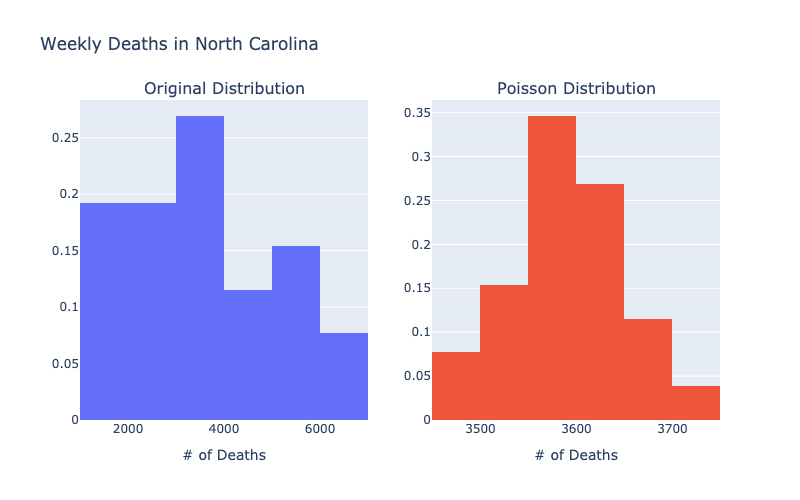

In [36]:
poisson_nc_deaths = np.random.poisson(np.mean(weekly_deaths_nc_data), len(weekly_deaths_nc_data))

fig = make_subplots(rows=1, cols=2, subplot_titles=('Original Distribution', 'Poisson Distribution'))

fig.add_trace(
    go.Histogram(x=weekly_deaths_nc_data, histnorm='probability'),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=poisson_nc_deaths, histnorm='probability'),
    row=1, col=2
)

fig.update_xaxes(title_text="# of Deaths", row=1, col=1)
fig.update_xaxes(title_text="# of Deaths", row=1, col=2)
fig.update_layout(
    title='Weekly Deaths in North Carolina',
    showlegend=False,
    width=800,
    height=500
)

fig.write_image("nc_poisson_deaths.png")
Image(filename="nc_poisson_deaths.png")

## What are the differences between the first modeling and poisson modeling

When we first looked at the data with histograms, we just wanted to see what the actual numbers of weekly cases and deaths looked like, kind of like taking a picture of them. We didn't make any guesses about how they should look; we just observed what was really happening.

But with Poisson modeling, we started making some guesses. We used a special math rule that says these kinds of things—like people getting sick—usually happen in a predictable way. This rule helped us think about the chances of a certain number of cases or deaths happening in a week.

The problem is, the way COVID-19 spreads doesn't always fit neatly into this rule. Sometimes there are more cases than we'd expect, and they can bunch up because of outbreaks, which means our math rule might not be the perfect tool to understand what's going on.

So, our first look with the histograms was just watching and describing. The Poisson modeling was more about expecting and predicting, using math to help us guess what might happen next. Each way gives us different clues about how the disease is moving through a place.

## Perform corelation between Enrichment data (Employment) and COVID-19 cases to observe any patterns. (20 points)


In [ ]:
employment_jul_aug_sep = pd.read_excel('allhlcn203.xlsx')
nj_employment_jul_aug_sep = employment_jul_aug_sep[employment_jul_aug_sep["St Name"] == "New Jersey"]
nj_employment_jul_aug_sep = nj_employment_jul_aug_sep[["July Employment", "August Employment", "September Employment"]]

employment_oct_nov_dec = pd.read_excel('allhlcn204.xlsx')
nj_employment_oct_nov_dec = employment_oct_nov_dec[employment_oct_nov_dec["St Name"] == "New Jersey"]
nj_employment_oct_nov_dec = nj_employment_oct_nov_dec[["October Employment", "November Employment", "December Employment"]]

In [ ]:
nj_employment_jul = nj_employment_jul_aug_sep["July Employment"].sum()
nj_employment_aug = nj_employment_jul_aug_sep["August Employment"].sum()
nj_employment_sep = nj_employment_jul_aug_sep["September Employment"].sum()

nj_employment_oct = nj_employment_oct_nov_dec["October Employment"].sum()
nj_employment_nov = nj_employment_oct_nov_dec["November Employment"].sum()
nj_employment_dec = nj_employment_oct_nov_dec["December Employment"].sum()

months = ["July", "August", "September", "October", "November", "December"]
employment_sums = [nj_employment_jul, nj_employment_aug, nj_employment_sep, nj_employment_oct, nj_employment_nov, nj_employment_dec]

data = {
    'Jul 2020 - Dec 2020': months,
    'Employment': employment_sums
}

fig = px.line(data, x='Jul 2020 - Dec 2020', y='Employment', title='New Jersey Monthly Employment from Jul 2020 - Dec 2020')
fig.write_image("nj_employment.png")
Image(filename="nj_employment.png")

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=weekly_cases_nj_data.index, y=weekly_cases_nj_data,
                         mode='lines', name='New Jersey'))

fig.update_layout(
    title='Weekly Cases in New Jersey',
    xaxis=dict(title='Each Week (Jul 2020 - Dec 2020)'),
    yaxis=dict(title='# of Cases'),
    showlegend=True,
    width=800,
    height=500
)

fig.write_image("nj_cases.png")
Image(filename="nj_cases.png")

### Correlation

At first, I figured that if more people were getting COVID-19, fewer people would have jobs—kind of like when one thing goes up, the other goes down. But it turns out, even when more people were catching the virus, more people were also getting back to work. The number of COVID-19 cases and the number of people working were both going up at the same time.

So why did jobs increase even when COVID-19 was spreading? Here are a few reasons:

- Bouncing Back: We were looking at a time when businesses were starting to open up again after being shut down. When the economy begins to recover like that, it's normal for jobs to start coming back, even if the virus is still around.
 
- Helping Hand from the Government: The government stepped in with some help, like money for businesses and extra benefits for workers. This kind of support can help keep people employed or get them back to work, no matter what's happening with COVID-19.

- Slow Reactions: Sometimes it takes a while for what's happening with the virus to affect jobs. Companies don't always hire or fire people right away when things change.

- Counting Cases: How we keep track of COVID-19 cases can also make a difference. If more people are getting tested, we might see more cases, but it doesn't necessarily mean the situation is getting worse.

- Where People Live: The number of people living close together can change things too. In big cities, the virus and jobs might look different than in the countryside.

So, it's a pretty complex picture with lots of things going on at the same time. It's not just about the virus—there's a whole mix of factors playing a part in the job market.

## Formulate hypothesis between Enrichment data and number of cases to be compared against states. Choose 3 different variables to compare against. (30 points)


### Hypothesis 1: The Relationship Between Employment and COVID-19 Cases

 H1: A robust job market in states correlates with a noticeable uptick in COVID-19 infections.

- Reasoning: It's presumed that when more people get back to work, there's a possibility of more social interaction, which could, in turn, mean a higher chance of the virus spreading. We'll examine if the data shows a clear link between more jobs and the number of COVID-19 cases.

### Hypothesis 2: The Effect of Lockdown Lifts on COVID-19 Spread

H2: States that remove lockdown measures witness a significant rise in COVID-19 infections.

- Reasoning: The idea here is that when states lift lockdowns, people tend to move around more and mingle, which could potentially lead to more cases of the virus. Our study will check if easing restrictions is tied to an increase in COVID-19 infections.

### Hypothesis 3: The Impact of Holidays on Virus Transmission

H3: States with active holiday social scenes see a considerable jump in COVID-19 numbers during the latter half of the year

- Reasoning: We're considering whether the festive spirit and gatherings from July through December, including major holidays, are a recipe for spreading the virus. The investigation will delve into whether a surge in cases correlates with these celebratory times.

### Correlations and Trends Exploration:

- Job Market Uptick and Virus Cases: We'll look into whether there's a tangible link between increasing employment and the rise in virus cases, suggesting that job growth could be a factor in higher infection rates.
- Post-Lockdown Activity and Virus Spread: Our examination will aim to connect the dots between the end of stay-at-home orders and a possible increase in virus cases, indicating that freer movement might be contributing to the spread.
- Festive Gatherings and Virus Transmission: The research will investigate if there's a correlation between holiday celebrations and a spike in virus cases, hinting at the role these gatherings could play in the transmission rates during the festive half of the year.